## Introduction

Investing has long been one of the best sources of wealth, attracting people from all professions. It is also a goldmine for data scientists - just the stock market alone sees hundreds of thousands of stocks generating new market data by the second! If we can interpret and even predict from just a small portion of this data, we'll be set for life. In fact, data science techniques ranging from simple statistical analysis to complex deep learning algorithms are being used more and more often by investment firms, hoping to take advantage of this near limitless pool of data that the human mind simply cannot fully comprehend on its own.

Note that stock market jargons are explained along the way, but some elementary domain knowledge is assumed.

## Tutorial Content

This tutorial will first introduce you to some useful methods of obtaining and visualizing stock data. Then, we'll work through a (somewhat simplified) example of data science in action: translating a real world investment strategy into algorithm, applying it to historic market data, backtesting its performance, and visualizing the results. The goal is not only to teach the particular strategy and code, but also to showcase the ease of which anyone can bring their investment idea into life and analyze its historic performance!

There exist many python packages designed for different quantitative analysis techniques on the stock market, but we will avoid them in this tutorial for two reasons. One being that they tend to be rather restrictive in scope and don't offer much freedom if we wanted to do something else. And two being that their documentations are already very clear, and it's usually just a simple function call to use them. As such, we will mostly rely on the trusty friends of data science - `pandas` and `matplotlib`.




With all that in mind, we will cover the following topics in this tutorial:
- [Installing the libraries](#Installing-the-libraries)
- [Querying Yahoo Finance for data](#Querying-Yahoo-Finance-for-data)
- [Example application: obtaining S&P 500 data](#Example-application:-obtaining-S&P-500-data)
- [Visualizing stock data](#Visualizing-stock-data)
- [Visualizing investment strategy: crossover](#Visualizing-investment-strategy:-crossover)
- [Example application: implementing and backtesting crossover strategies](#Example-application:-implementing-and-backtesting-crossover-strategies)
- [Summary and references](#Summary-and-references)



## Installing the libraries

First we'll need to install the necessary libraries - we require two finance related ones.

[yfinance](https://pypi.org/project/yfinance/) is an extremely useful library for downloading financial market data from Yahoo! finance. To install it you'll also need to have `pandas`, `numpy`, `requests` and `lxml` installed. 

    $ pip install yfinance --upgrade --no-cache-dir

[mplfinance](https://github.com/matplotlib/mplfinance) is part of `matplotlib` utilities that offers great freedom in the visualization and visual analysis of financial data. To install it you'll also need to have `pandas` and `matplotlib` installed.

    $ pip install --upgrade mplfinance
    
After installing the necessary libraries, you can import them below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
import mplfinance as mpf

## Querying Yahoo Finance for data

Our first step is to obtain data. [Yahoo Finance](https://finance.yahoo.com/) offers a wide range of market data on investment products such as stocks, bonds, and options, but requires a tedious process of manually searching up each one and downloading their data. Instead, we can access and download this data efficiently using the `yfinance` package. For this tutorial we will only deal with historic stock market data, but do keep in mind that there are so much more useful information that you can easily obtain using `yfinance`.

The key function we need is `yf.download()`, which takes in a `string` or `list` of ticker symbols (each stock has its unique ticker symbol) and some optional parameters, and returns a pandas `DataFrame` of their market trading data. For example, to check out the crazy performance of meme stocks like GameStop, AMC Entertainment, and Koss Corporation in recent months, we can use their ticker symbols GME, AMC and KOSS.

In [2]:
sample_df = yf.download(
    # tickers can be a list or string, with one or more ticker symbols
    tickers = ["GME", "AMC", "KOSS"], 
    # get data from all trading days between these two dates
    start="2021-01-01", end="2021-04-01",
    # the interval between each 'datapoint': from 1 minute (e.g. for high frequency trading) to 3 months
    interval = "1d",
    # group the dataframe by metrics/features (e.g. open and close price) or by stocks
    group_by = "ticker",
    # use open/high/low/close prices that have been adjusted for dividends/stock splits
    auto_adjust = True)

[*********************100%***********************]  3 of 3 completed


In [3]:
sample_df.head()

KOSS                             AMC                              \
            Open  High   Low Close  Volume  Open  High   Low Close    Volume   
Date                                                                           
2021-01-04  3.31  3.40  2.90  3.19  245100  2.20  2.20  2.00  2.01  29873800   
2021-01-05  3.13  3.37  2.96  3.11  116600  1.99  2.03  1.91  1.98  28148300   
2021-01-06  3.09  3.24  3.05  3.05   34600  2.03  2.23  1.97  2.01  67363300   
2021-01-07  3.11  3.18  2.97  3.15   84600  2.08  2.11  2.02  2.05  26150500   
2021-01-08  3.28  3.28  3.00  3.27   62300  2.09  2.21  2.07  2.14  39553300   

                  GME                                         
                 Open       High    Low      Close    Volume  
Date                                                          
2021-01-04  19.000000  19.100000  17.15  17.250000  10022500  
2021-01-05  17.350000  18.080000  17.23  17.370001   4961500  
2021-01-06  17.340000  18.980000  17.33  18.360001   6056200  
2021-01-07  18.469999  19.450001  18.02  18.080000   6129300  
2021-01-08  18.180000  18.299999  17.08  17.690001   6482000

This dataframe has a `DatetimeIndex` and is grouped by stocks. Each has some typical metrics associated with it - market open, high, low, and close prices, as well as trading volumn of the day. Their units are USD and number of shares respectively. For those with some domain knowledge, the argument `auto_adjust = True` ensures these prices have been adjusted for stock splits and dividends, which is what's usually used for data analysis.

Since this is a pandas `DataFrame`, we can use any of the standard calls and methods, giving us great freedom in manipulating and processing this data for analysis. To see a subset of the stocks, we can use `sample_df["GME"]` for one or `sample_df[["GME", "AMC"]]` for multiple. To see only a subset of the trading days, we can use `sample_df["2021-02-01":"2021-03-01"]`. For example, if we wanted to see the extreme price fluctutations of GME and AMC between late january and early feburary, we can do:

In [4]:
sample_df["2021-01-25":"2021-02-05"][["GME", "AMC"]]

GME                                                   AMC  \
                  Open        High         Low       Close     Volume   Open   
Date                                                                           
2021-01-25   96.730003  159.179993   61.130001   76.790001  177874000   4.71   
2021-01-26   88.559998  150.000000   80.199997  147.979996  178588000   5.09   
2021-01-27  354.829987  380.000000  249.000000  347.510010   93396700  20.34   
2021-01-28  265.000000  483.000000  112.250000  193.600006   58815800  11.98   
2021-01-29  379.709991  413.980011  250.000000  325.000000   50259200  14.31   
2021-02-01  316.559998  322.000000  212.000000  225.000000   37382200  17.00   
2021-02-02  140.759995  158.000000   74.220001   90.000000   78183100   9.48   
2021-02-03  112.010002  113.400002   85.250000   92.410004   42698500   8.85   
2021-02-04   91.190002   91.500000   53.330002   53.500000   62427300   8.70   
2021-02-05   54.040001   95.000000   51.090000   63.770000   80886300   7.17   

                                                 
                 High    Low  Close      Volume  
Date                                             
2021-01-25   4.880000   3.85   4.42   443238100  
2021-01-26   5.190000   4.37   4.96   456850200  
2021-01-27  20.360001  11.01  19.90  1222342500  
2021-01-28  16.500000   6.51   8.63   591223900  
2021-01-29  16.000000  11.60  13.26   602193300  
2021-02-01  17.250000  12.91  13.30   434608000  
2021-02-02  10.100000   6.00   7.82   462775900  
2021-02-03   9.770000   7.89   8.97   221405100  
2021-02-04   8.740000   7.00   7.09   162985800  
2021-02-05   8.270000   6.52   6.83   195267800

Finally, we may wish to download this data (perhaps after some processing too) and save it for easy retrieval at any time. This can be achieved using pandas' `.to_csv()` function. When we need this dataset again, we can use `pd.read_csv()`, but will need to specify a few settings to retain the original format as shown below.

In [5]:
sample_df.to_csv("sample.csv.gz") # save data to file
saved_df = pd.read_csv("sample.csv.gz", header=[0, 1], index_col=0, parse_dates=[0]) # read data from file
saved_df.head()

KOSS                             AMC                              \
            Open  High   Low Close  Volume  Open  High   Low Close    Volume   
Date                                                                           
2021-01-04  3.31  3.40  2.90  3.19  245100  2.20  2.20  2.00  2.01  29873800   
2021-01-05  3.13  3.37  2.96  3.11  116600  1.99  2.03  1.91  1.98  28148300   
2021-01-06  3.09  3.24  3.05  3.05   34600  2.03  2.23  1.97  2.01  67363300   
2021-01-07  3.11  3.18  2.97  3.15   84600  2.08  2.11  2.02  2.05  26150500   
2021-01-08  3.28  3.28  3.00  3.27   62300  2.09  2.21  2.07  2.14  39553300   

                  GME                                         
                 Open       High    Low      Close    Volume  
Date                                                          
2021-01-04  19.000000  19.100000  17.15  17.250000  10022500  
2021-01-05  17.350000  18.080000  17.23  17.370001   4961500  
2021-01-06  17.340000  18.980000  17.33  18.360001   6056200  
2021-01-07  18.469999  19.450001  18.02  18.080000   6129300  
2021-01-08  18.180000  18.299999  17.08  17.690001   6482000

## Example application: obtaining S&P 500 data

In real world applications, we often want to obtain data for large amounts of stocks - perhaps the component stocks from an index, or even all stocks traded in a country. This requires a complete list of their ticker symbols in order to access their data using `yf.download()`. For example, we may be interested in the [S&P 500](https://en.wikipedia.org/wiki/S%26P_500), one of the most commonly followed stock market indicies. It comprises of 505 stocks issued by 500 large-cap (i.e. high market capitalization) companies. It is a popular choice for data science analysis, and the stocks are often great potential investment targets.

But this list is dynamic and could suddenly change due to changes in market capitalization. We can obtain an up to date list by scraping the information from wikipedia using `pd.read_html()`. For example, since we're interested in the S&P 500, we can use its wiki page https://en.wikipedia.org/wiki/List_of_S%26P_500_companies. It's clear that the very first table of the page contains all current component stocks, which is exactly what we need.

In [6]:
sp_wiki = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp_info_df = sp_wiki[0] # take the first table

In [7]:
sp_info_df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


Then to retrieve a list of just the ticker symbols we can resort to standard pandas operations on the `Symbol` column:

In [8]:
sp_syms = sp_info_df['Symbol'].values.tolist()
print(len(sp_syms))
sp_syms[:5]

505


['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN']

We see that this list contains 505 ticker symbols as expected. Finally we just have to call `yf.download()` with any desired time period to obtain the dataset:

In [9]:
sp_df = yf.download(tickers=sp_syms, start="2021-01-01", end="2021-04-01",
                    auto_adjust=True, group_by="ticker")

[*********************100%***********************]  505 of 505 completed

4 Failed downloads:
- WRK: No data found for this date range, symbol may be delisted
- FOX: No data found for this date range, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [10]:
sp_df.head()

UAA                                                    ETSY  \
                 Open       High        Low      Close     Volume        Open   
Date                                                                            
2021-01-04  17.580000  17.580000  17.049999  17.350000  4891700.0  179.520004   
2021-01-05  17.370001  18.000000  17.260000  17.850000  4977400.0  170.190002   
2021-01-06  17.860001  18.320000  17.740000  17.969999  4524000.0  172.110001   
2021-01-07  18.100000  18.280001  17.790001  18.030001  5284300.0  170.300003   
2021-01-08  18.129999  18.209999  17.670000  17.700001  4376900.0  172.910004   

                                                           ...         MCO  \
                  High         Low       Close     Volume  ...        Open   
Date                                                       ...               
2021-01-04  181.600006  168.251999  172.080002  3262000.0  ...  292.840778   
2021-01-05  175.770004  169.061996  174.979996  2168200.0  ...  290.516030   
2021-01-06  173.160004  166.330002  167.570007  2966000.0  ...  281.795639   
2021-01-07  173.500000  167.250000  170.789993  2785200.0  ...  282.514030   
2021-01-08  179.729996  171.759995  175.649994  2470400.0  ...  282.374357   

                                                                 OXY  \
                  High         Low       Close     Volume       Open   
Date                                                                   
2021-01-04  293.738750  288.231159  291.344147  1356800.0  17.750000   
2021-01-05  294.038100  282.334435  283.741272   832900.0  17.799999   
2021-01-06  284.399793  276.856776  280.718079  1035800.0  19.520000   
2021-01-07  287.043841  280.209221  280.748016   749900.0  20.209999   
2021-01-08  283.671425  276.337927  279.580627   650200.0  20.879999   

                                                         
                 High        Low      Close      Volume  
Date                                                     
2021-01-04  17.980000  17.320000  17.450001  18497800.0  
2021-01-05  19.950001  17.650000  19.209999  37293800.0  
2021-01-06  20.280001  18.969999  20.000000  37156400.0  
2021-01-07  21.150000  20.030001  20.570000  24299300.0  
2021-01-08  21.030001  19.870001  20.080000  18277900.0  

[5 rows x 2529 columns]

Notice that a few may fail to download. This could be simply an API issue that requires retrying, or is due to the fact that we're using the most current list of S&P 500 stocks, some of which may not have existed for the desired time range.

## Visualizing stock data

Now that we know how to retrieve stock data as a pandas `DataFrame`, we may wish to view it in graphic form. This can be done using the `mplfinance` package. The most basic usage is simply `mpf.plot()`, which takes in a `DataFrame` object containing the daily open, high, low, and close prices of a stock with a `DatetimeIndex` - exactly what we got from `yf.download()`!

There are many interesting plots you can make, specified by the `type` parameter, and we'll show a couple of them here. Once again we will use the meme stock GME as an example. The simplest is just a line plot of the closing prices, which is something you'd usually see if you just searched up "GME stock" on google.

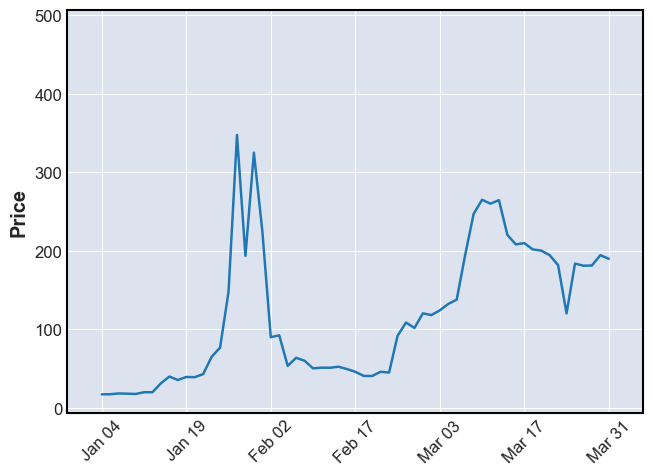

In [11]:
mpf.plot(sample_df["GME"], type="line")

But more professional investors tend to prefer what's known as a [Candlestick chart](https://en.wikipedia.org/wiki/Candlestick_chart), which neatly incorporates the open, high, low, and close prices of a stock.

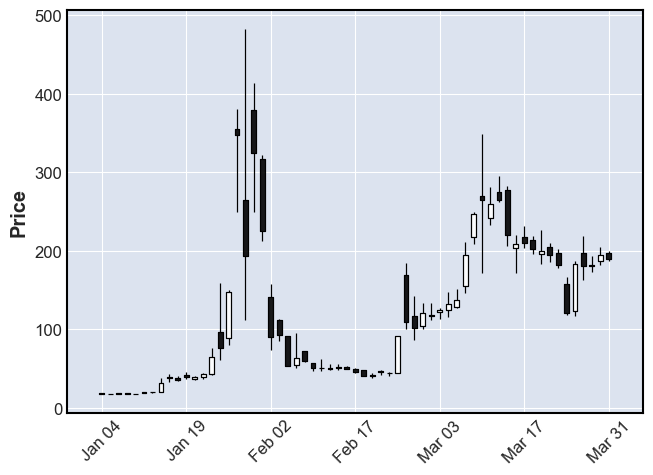

In [12]:
mpf.plot(sample_df["GME"], type="candle")

If you wanted more information, you can even incorporate trading volume! For seasoned investors this can yield lots of information about the stock. For example, notice that the huge price fluctuations are often matched by a sudden increase in trading volumn.

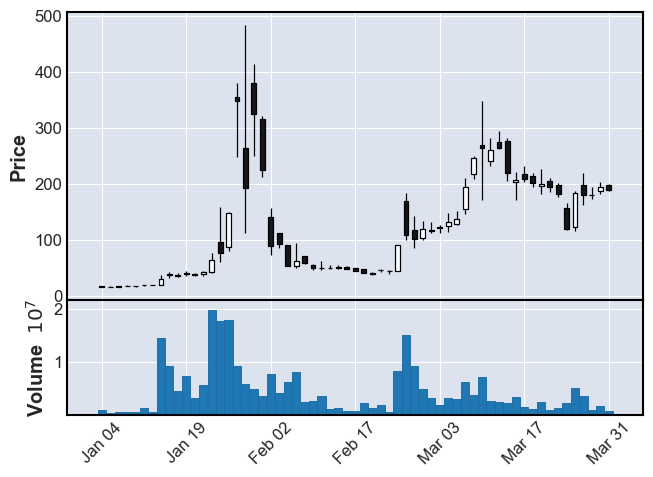

In [13]:
mpf.plot(sample_df["GME"], type="candle", volume=True)

## Visualizing investment strategy: crossover

For those interested in technical analysis, the moving average of stock price is a nice indicator for predicting future trends (i.e. will the stock price increase or decrease). There are many interesting theories and real world examples of moving averages being used, but one of the simplest is the trend following [Crossover strategy](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp).

Essentially, we calculate two moving average (MA) lines over the daily stock price, with different interval lengths (the stock price itself can be considered as a moving average of length 1 day). When the shorter-term MA crosses and goes above the longer-term MA, it indicates the price trend is going up and suggests we should buy the stock. Conversely when the shorter-term MA crosses and goes below the longer-term MA, it indicates the price trend is going down and suggests we should sell.

This moving average line can be easily added to the plot using `mpf.plot()` by setting `mav=d` where d is the length of the MA in days. If you wanted to add multiple moving averages, you can use a tuple `mav=(d1, d2)`.

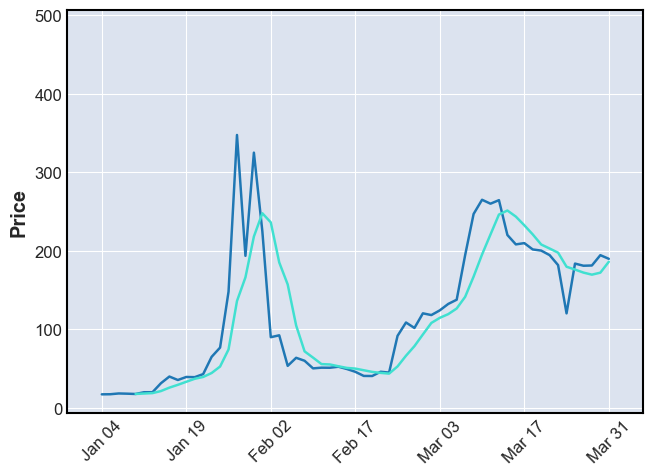

In [14]:
mpf.plot(sample_df["GME"], type="line", mav=5)

Here we used a 5 day MA (light blue line), while the daily price itself is used as the shorter-term MA (dark blue line). We see that this simple strategy almost perfectly predicted the major rises and falls in GME stock price. For example, in mid Feburary stock price crossed upwards, just before it almost tripled, and then crossed downwards right before a major plummet. The visual below demonstrates the power of crossover in action. Through this we can see that sometimes even simple visualizations can yield great information for investing!

![Crossover example](crossover_example.png)

## Example application: implementing and backtesting crossover strategies

We have seen that even simple strategies like crossover can turn out to be a very useful indicator for making investment decisions. But how well does it really work? Let's dig deeper and apply some more rigorous data analysis. 

We will continue with the crossover strategy, and implement features following these steps:
- turn the crossover strategy into an algorithm
- apply the strategy to historic market data and simulate the buy/sell signals it produces
- estimate the return from following the strategy
- produce useful visualizations of the strategy in action, as well as its performance

Notice that this is a very general framework that can be applied to many investment strategies. In fact, we will try to write relatively generalizable functions such that you can just as easily test your own idea!

Remember the S&P 500 data we just showed how to download? Now is the perfect time to use them - they are often used in quantitative finance for training and testing strategies.

Let's begin by downloading the S&P 500 stock data again, this time grouping by metrics so that we can easily single out the daily closing price (this is the price usually used in data analysis if only one is required).

In [15]:
sp_all_df = yf.download(tickers=sp_syms, start="2019-09-01", end="2021-04-01",
                        auto_adjust=True, group_by="column")
# remove the occasional stock with error
sp_df = sp_all_df["Close"].dropna(axis=1, how="all")

[*********************100%***********************]  505 of 505 completed

3 Failed downloads:
- WRK: No data found for this date range, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


Now is time to implement the crossover strategy. We will consider three different types of moving averages: simple MA, exponential MA, and just price (i.e. simple MA with length 1). These can be computed using `.rolling()` and `.ewm()` combined with `.mean()`.

In [16]:
def get_stats(parameter, close):
    """
    Given some MA strategy and daily stock price, return the appropriate averages
    
    Parameters:
        parameter (tuple): has the form (MA type, length)
        close (pandas Series): the daily stock price
    
    Returns:
        (pandas Series): averaged stock price using the given MA strategy
    """
    if parameter[0] == 'sma': # simple moving average
        period = parameter[1]
        return close.rolling(window=period).mean().rename('sma'+str(period))
    elif parameter[0] == 'ema': # exponential moving average
        period = parameter[1]
        return close.ewm(span=period, adjust=False).mean().rename('ema'+str(period))
    elif parameter[0] == 'price': # special case of sma with length = 1
        return close

Recall that we use two MA lines. Let the shorter one be `ma_short` and the longer one be `ma_long`. The strategy is simple to implement as an algorithm: when `ma_short > ma_long`, we should be buying or have already bought the stock (so let our position be +1). Conversely when `ma_short < ma_long`, we should be short selling or have already shorted the stock (so let our position be -1). [Short selling](https://en.wikipedia.org/wiki/Short_(finance) is essentially the opposite of buying - we make money if the stock price drops.

In [17]:
def get_trading_pos(ma_long, ma_short):
    """
    Given two moving average series', return our stock position (+1/buy or -1/sell)
    
    Parameters:
        ma_long (pandas Series): longer-term moving average of daily stock price
        ma_short (pandas Series): shorter-term moving average of daily stock price
    
    Returns:
        (pandas Series): daily position of stock, +1 means we have bought it, -1 means we've sold it
    """
    trading_pos_raw = ma_short - ma_long
    # we make a shift due to information lag
    trading_pos = trading_pos_raw.apply(np.sign).shift(2)
    return trading_pos

Now that we can compute the buy/sell signals generated by the crossover strategy given historic stock prices, we can calculate the return (i.e. how much money we make) from the strategy. But first, you might know that there are costs associated with buying or selling stocks, including commission and changes in stock price. Although we've made the assumption to use daily closing price only, the actual trading price might differ. That is why we should add some cost associated with each buy or sell in order to estimate a more realistic return (say, at 0.05% of the total value per trade).

In [18]:
def get_costs(trading_pos):
    """
    Given the trading positions, compute the costs for whenever we buy or sell (i.e. changes between +1 and -1)
    
    Parameters:
        trading_pos (pandas Series): daily position of stock, +1 means we own it, -1 means we've short sold it
    
    Returns:
        (pandas Series): same time length as trading_pos, has cost for whenever we make a trade, and 0 otherwise
    """
    # 0.05% cost
    cost = 0.0005
    # whenever our position changes, a trade has happened, so add a cost to that day
    costs = (abs(trading_pos.diff())/2).shift(-1).fillna(0) * (cost)
    return costs

Finally we can calculate the returns. In order to be more comprehensive in our analysis, it makes sense to calculate the cumulative return at each day, so that we can later plot the gradual change in return and wealth over time. This is just simple applications of pandas' `.pct_change()` and `.cumprod()`.

In [19]:
def get_returns(trading_pos, close, start, end):
    """
    Calculates the cumulative return for each day over some time period
    
    Parameters:
        trading_pos (pandas Series): daily position of stock, +1 means we own it, -1 means we've short sold it
        close (pandas Series): the daily stock price
        start, end (str): start and end time, has form "yyyy-mm-dd"
    
    Returns:
        (pandas Series): the cumulative return for each day over the time period
    """
    daily_pct_returns = (close.pct_change() * trading_pos) + 1
    costs = get_costs(trading_pos)
    daily_pct_returns_with_costs = daily_pct_returns - costs
    cum_strat_pct_returns = daily_pct_returns_with_costs[start:end].cumprod()
    cum_strat_relative_returns = cum_strat_pct_returns - 1
    return cum_strat_relative_returns

Wow! In about 20 lines of code, we have just finished translating a real world investment strategy, including ways to test its performance, into python! Now all we have to do is to present the results in some way. Let's draw some visualizations using `matplotlib`. First, we would like to plot the moving averages, so that we know what's going on and can see when crossovers happen. If you recall, we showed how to do this with `mpf.plot()`. But we can just as easily draw it ourselves.

In [20]:
def draw_averages(parameters, close, start, end):
    """
    Plots the moving averages (and price if specified) within the given time period
    
    Parameters:
        parameters (list of tuples): each element is a strategy of the form (MA type, length) or ("price")
        close (pandas Series): the daily closing price of the stock
        start, end (str): start and end time, has form "yyyy-mm-dd"
    Plots:
        similar to mpf.plot(), moving averages (and daily stock price) as a line graph
    """
    n = len(parameters)
    averages_lst = [None] * n
    for i in range(n):
        averages_lst[i] = get_stats(parameters[i], close)
    pd.concat(averages_lst, axis=1)[start:end].plot(figsize=(16, 9)).set_ylabel('Price (USD)')

Since each crossover signals a change in our position (buy or sell), it would be helpful to plot our position and its change over time. Finally, we should also plot the performance of the crossover strategy. We can do so with a wealth curve, where we begin with 1, and if we end up with 1.5, that means our strategy earned us 50% return!

In [21]:
def draw_returns(parameters, close, start, end):
    """
    Draws relevant performance plots based on the given crossover strategy
    
    Parameters:
        parameters (list of tuple, len=2): (ma_long, ma_short) for crossover, each has form (MA type, length)
        close (pandas Series): the daily closing price of the stock
        start, end (str): start and end time, has form "yyyy-mm-dd"
    Plots:
        the daily stock price and moving averages as a line graph
        our position (+1/-1) over time following the crossover strategy
        our wealth overtime (starting with 1) on a log scale
    """
    if len(parameters) != 2: return false
    stats_long = get_stats(parameters[0], close)
    stats_short = get_stats(parameters[1], close)
    
    trading_pos = get_trading_pos(stats_long, stats_short)
    
    cum_strat_relative_returns = get_returns(trading_pos, close, start, end)
    
    draw_averages(parameters, close, start, end)
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,9))
    trading_pos[start:end].plot(figsize=(16,9), ax=axes[0]).set_ylabel('trading position')
    (1 + cum_strat_relative_returns).plot(figsize=(16,9), ax=axes[1]).set_ylabel('cumulative wealth')
    print("final return: {}".format(cum_strat_relative_returns[-1]))

At last, it's time to see the fruits of our labor. We will only show a few examples here, but the code is all self-contained, and there are countless possibilities for you to try out on your own!

First, let's check out Apple - a popular investment target. Suppose we choose an exponential MA of length 30 and the stock price itself, we would have made a 95% profit since 2020, almost double our money!

final return: 0.9601701558604614


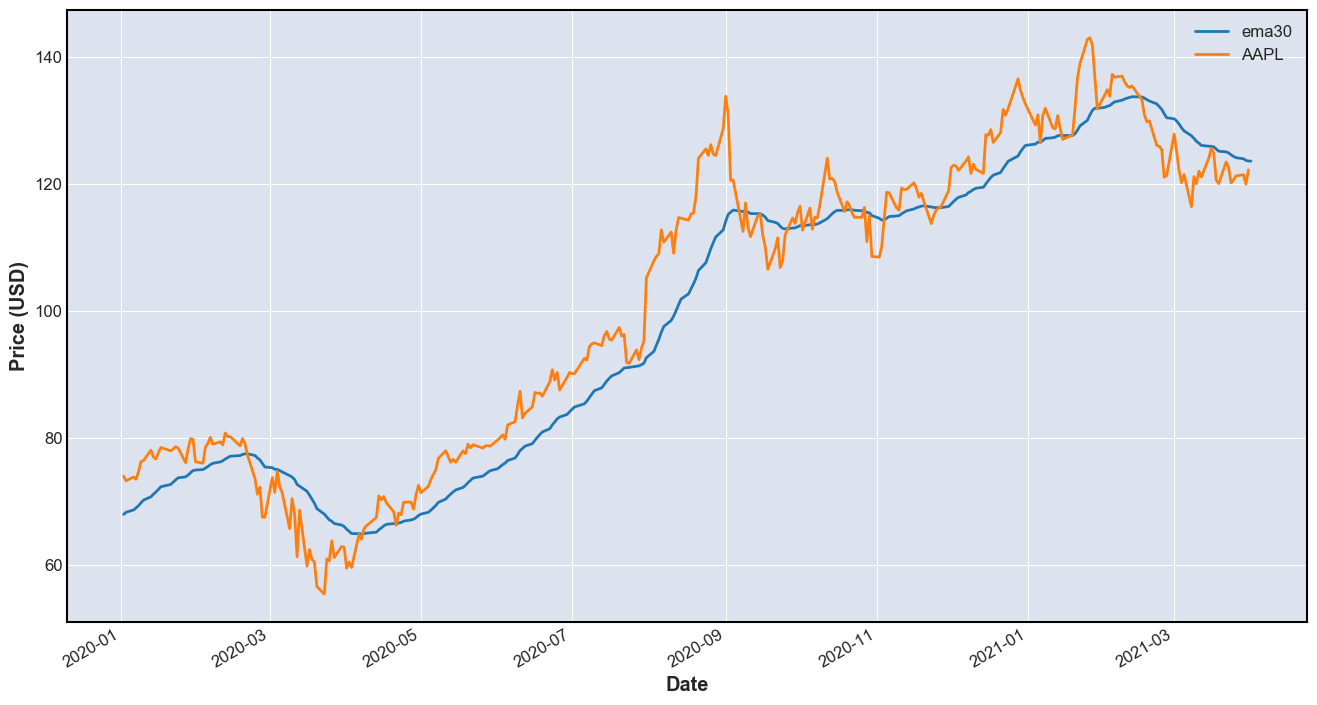

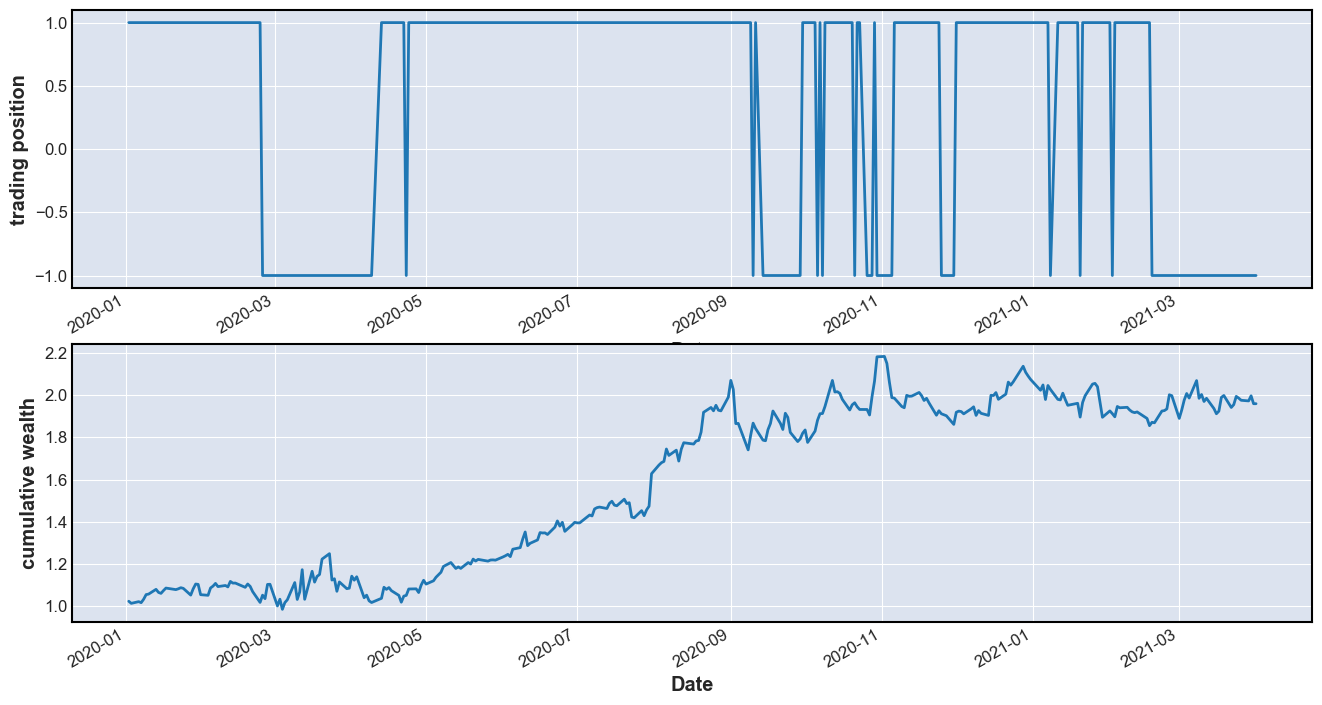

In [22]:
draw_returns([['ema', 30], ['price']], sp_df["AAPL"], '2020-01-01', '2021-04-01')

Now let's try a completely different company, say General Eletric. This time we'll try a different strategy too: two simple MA of length 30 and 10. Once again we were able to make a neat 70% profit since 2020, despite its actual stock price not changing much at all!

final return: 0.6911023648736654


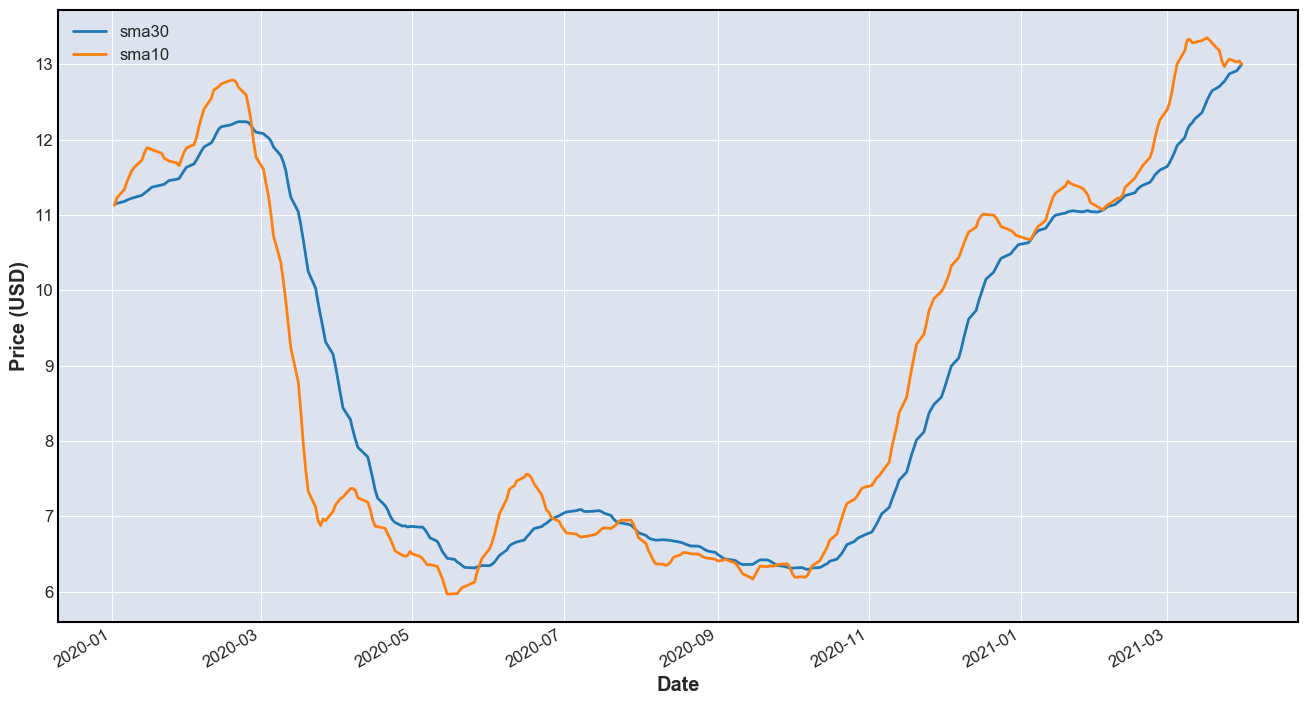

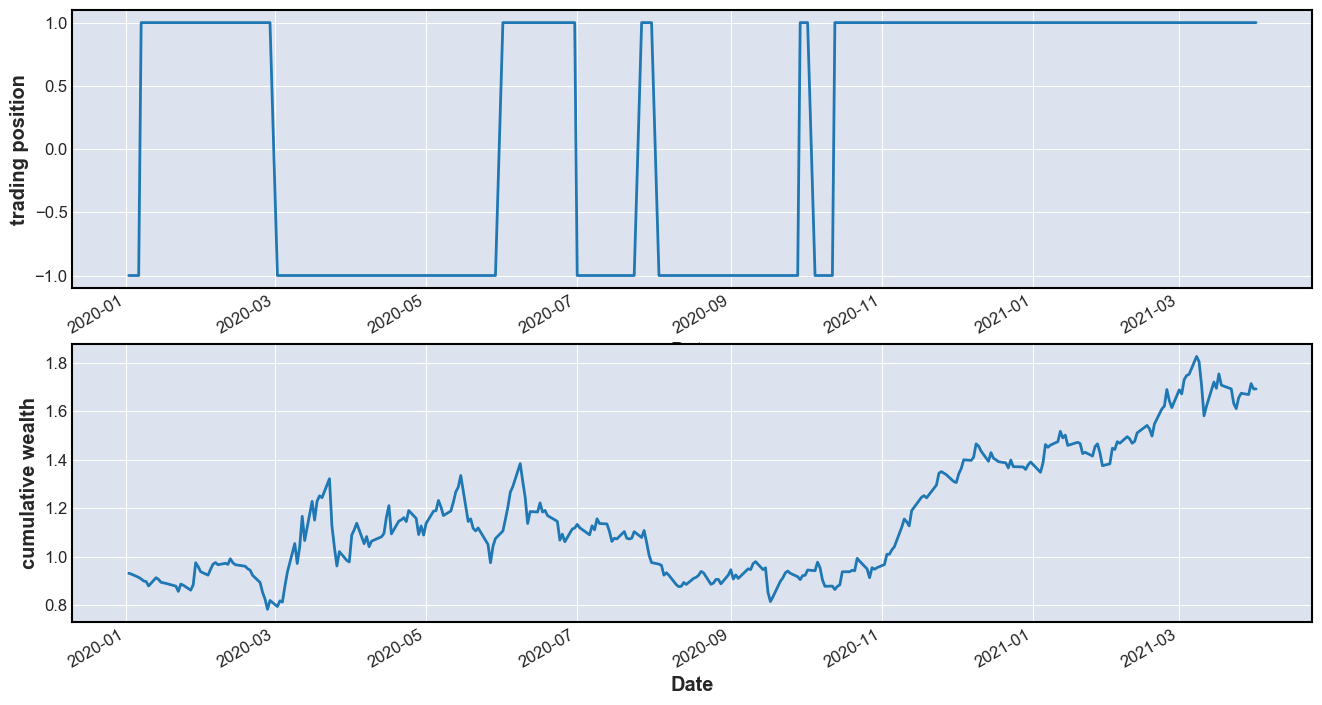

In [23]:
draw_returns([['sma', 30], ['sma', 10]], sp_df["GE"], '2020-01-01', '2021-04-01')

Now that we can easily visualize and interpret the performance of any crossover strategy on any stock, it's time to take it a step further and test the performance of the strategy on the whole S&P 500. Due to space constraints, we'll keep it simple and only care about the final return of each stock.

In [24]:
def get_all_returns(parameters, close_df, start, end):
    """
    Computes the return of each stock given a crossover strategy, and plots the return distribution
    
    Parameters:
        parameters (list of tuple, len=2): (ma_long, ma_short) for crossover, each has form (MA type, length)
        close_df (pandas DataFrame): the daily closing price of the stocks, each column is a stock
        start, end (str): start and end time, has form "yyyy-mm-dd"
    
    Returns:
        (pandas DataFrame): the final return of each stock
    
    Plots:
        the final return distribution of all given stocks
    """
    n = len(close_df.columns)
    rets_df = pd.DataFrame(columns=["Stock", "Return"])
    for i in range(n):
        # this is simply applying our previous functions for each stock
        strat_long = parameters[0]
        strat_short = parameters[1]
        close = close_df.iloc[:,i]
        ma_short = get_stats(strat_short, close)
        ma_long = get_stats(strat_long, close)
        trading_pos = get_trading_pos(ma_long, ma_short)
        cum_returns = get_returns(trading_pos, close, start, end)
        rets_df = rets_df.append({"Stock": close_df.columns[i], "Return": cum_returns[-1]}, ignore_index=True)
    plt.hist(rets_df["Return"], bins=20, ec='black')
    return rets_df

Once again using two arbitrary MAs, say simple MA of length 30 and 10 again, we can now see the distribution of final return for the 500+ stocks. Just from a glance, the results seem to be decent. The distribution is very skewed to the right, meaning that some stocks gave insane returns using the crossover strategy! Moreoever, this function returns a `DataFrame` of the final return of each stock, from which we can perform a lot more analysis if desired.

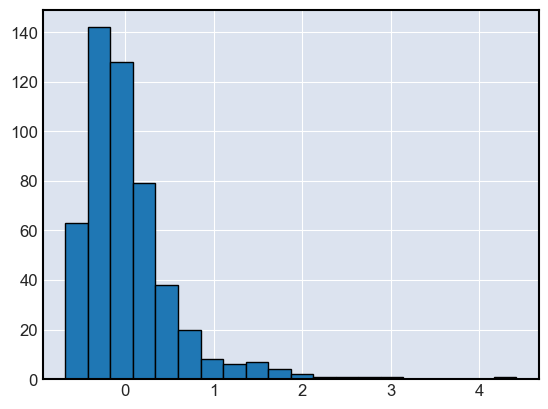

In [25]:
rets_df = get_all_returns((['sma', 30], ['sma', 10]), sp_df, "2020-01-01", "2021-04-01")

## Summary and references

This tutorial has demonstrated how fast one can obtain stock data, visualize them, and start experimenting with investment ideas. We were able to produce promising results without even using anything complex! The hope is that more people can recognize the power of data science techniques, and how simple it is to apply them to the stock market using python. For those interested, you can find a lot more in-depth information about the libraries, concepts, and potential extensions below.

- [yfinance](https://pypi.org/project/yfinance/): efficiently obtain financial data.
- [Yahoo Finance](https://finance.yahoo.com/): website from which data is obtained.
- [mplfinance](https://github.com/matplotlib/mplfinance): easy plotting tool for stock prices.
- [Candlestick chart](https://en.wikipedia.org/wiki/Candlestick_chart): a popular style of plotting stock prices over time.
- [S&P 500](https://en.wikipedia.org/wiki/S%26P_500): a popular stock index often used in data analysis.
- [Crossover strategies](https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp): a simple yet often effective indicator for investment strategies.
- [Moving Average Convergence Divergence (MACD)](https://www.investopedia.com/terms/m/macd.asp): a special application of the crossover strategy that is very popular in technical analysis - perhaps you can test it out!
- [PyNance](http://pynance.net/): a useful package for building features and applying machine learning to stock data, you can check it out for direct use or for inspiration.
- [Factor Investing](https://www.blackrock.com/us/individual/investment-ideas/what-is-factor-investing): a popular quantitative investment strategy with heavy use of data science techniques, definitely a great choice for a project